# Aula 15 - Visualização de dados pt2 - gráficos estatísticos

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Seaborn - visualização estatística

_____________

### Problema gerador: como incorporar visualizações à EDA?

Aprendemos recentemente sobre a importante atividade de análise exploratória de dados (EDA). Fomos capazes de fazer análises profundas utilizando apenas as ferramentas de processamento de dados que conhecemos (Pandas, essencialmente). Mas, e se quisermos deixas as análises mais intuitivas, com o uso de gráficos? Vamos ver como fazer isso hoje!

____

## 1) Seaborn - visualização estatística

Vamos agora conhecer outra biblioteca de dataviz: o **seaborn**.

Essa biblioteca é construída usando a matplotlib, e tem como foco produzir **gráficos estatísticos** como por exemplo:

- plots de distribuição;
- plots categóricos;
- plots de matriz

Vamos ver exemplos de usabilidade dos tipos de gráficos acima. Para ilustrar esses gráficos, vamos utilizar alguns datasets que já vêm com o prório seaborn!

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
import seaborn as sns

Pra garantir que vamos ter as mesmas funcionalidades, é importante que todos estejamos com a versão `v.0.11` ou maior.

Pra checar a versão:


In [97]:
sns.__version__

'0.12.2'

Para quem precisar atualizar o seaborn, faça o seguinte (em uma célula aqui do jupyter mesmo):

`!pip install seaborn --upgrade`

### Datasets do seaborn

Para facilitar sua documentação, o seaborn disponibiliza alguns datasets que podem ser lidos diretamente. A função `sns.get_dataset_names()` mostra os datasets disponíveis:

In [98]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Aí, basta usar o `sns.load_dataset()` com o dataset desejado para lê-lo:

In [99]:
df = sns.load_dataset('tips')

In [100]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Esse é um dataframe que contém informações sobre mesas de um restaurante e as gorjetas (tips) que as pessoas da mesa deram, juntamente com outras informações relativas ao pedido.

Esses dados podem ser utilizados, por exemplo, para prever o quanto de gorjeta se espera receber de determinada mesa!

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [102]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Plots de distribuição

Como o nome indica, são gráficos que nos auxiliam a visualizar a **distribuição dos dados**, ou seja, como os dados estão distribuídos nos diferentes valores que determinadas variáveis podem assumir.


__Histplot__

Este tipo de gráfico ilustra a **distribuição dos dados numéricos**, através de um histograma.

Por padrão, o gráfico não mais produz automaticamente a curva [KDE](https://pt.wikipedia.org/wiki/Estimativa_de_densidade_kernel) da distribuição, isso é, uma **estimativa para a função densidade de probabilidade da distribuição.** Se quisermos ver esta curva, basta utilizar `kde=True`.

Vamos começar a analisar a coluna `total_bill`:

In [103]:
df["total_bill"].values

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [104]:
df["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<Axes: title={'center': 'Distribuição da variável Tip (Gorjeta)'}, xlabel='tip', ylabel='Count'>

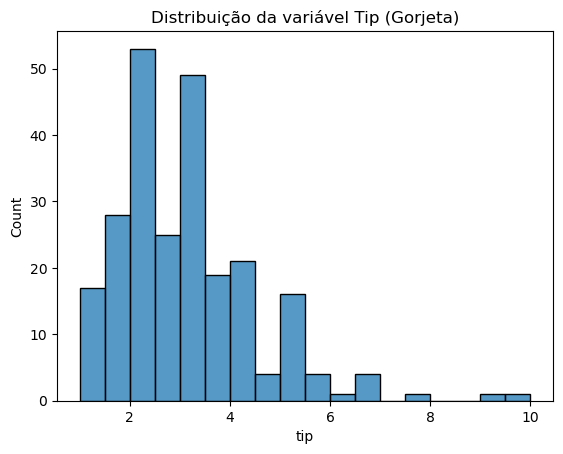

In [105]:
plt.title("Distribuição da variável Tip (Gorjeta)")
sns.histplot(data = df, x = "tip")

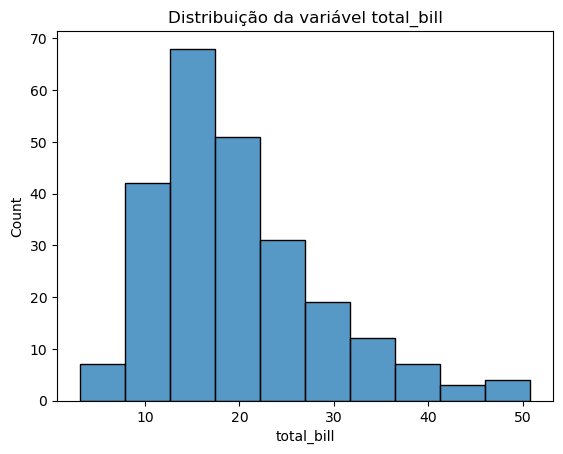

In [106]:
plt.title("Distribuição da variável total_bill")
sns.histplot(data=df, x="total_bill", bins = 10); # bins determina a quantidade fixa de barras que serão plotadas no gráfico.

In [107]:
df["total_bill"].max() # valor maximo da coluna total_bill.

50.81

In [108]:
df["total_bill"].min() # valor minimo da coluna total_bill.

3.07

In [109]:
'''
# Intervalo de valores.
'''

df["total_bill"].max() - df["total_bill"].min()

47.74

In [110]:
'''
Valores que cada barra do grafico possui = Intervalo de valores / qtd de barras existentes no grafico.

'''

(df["total_bill"].max() - df["total_bill"].min())/10 

4.774

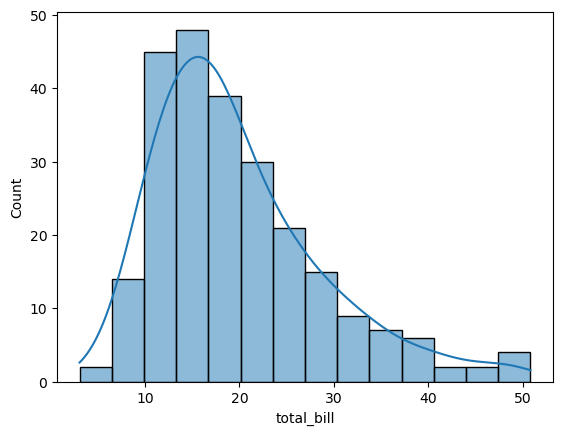

In [111]:
# Gráfico barra + Curva de descrição [kde = True]
sns.histplot(data=df, x="total_bill", kde=True);

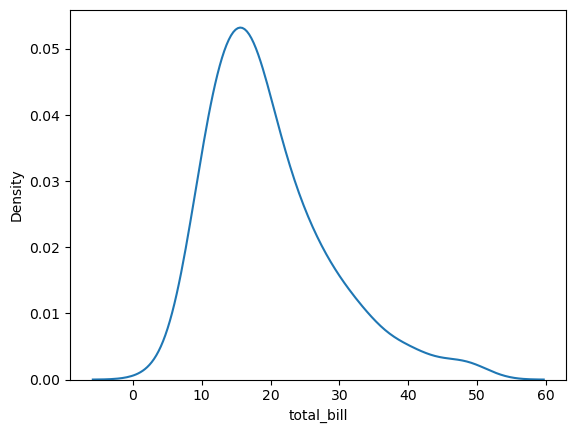

In [112]:
# Somente Curva de descrição [kde = True]
sns.kdeplot(data=df, x="total_bill");

Podemos visualizar a distribuição de `total_bill` para diferentes tamanhos de mesa (`size`):

In [113]:
# Quantidades de pessoas por mesas.
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [114]:
df.query("size == 1")

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


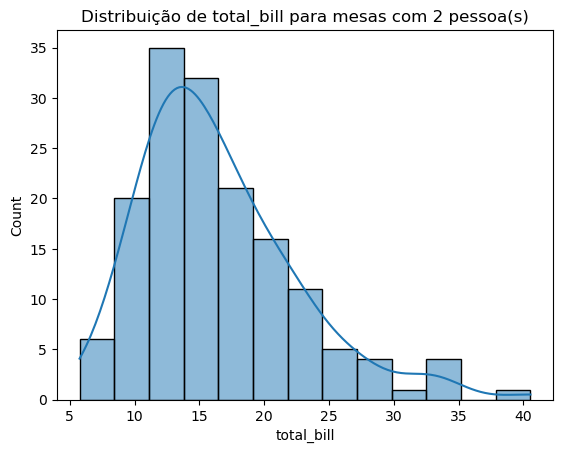

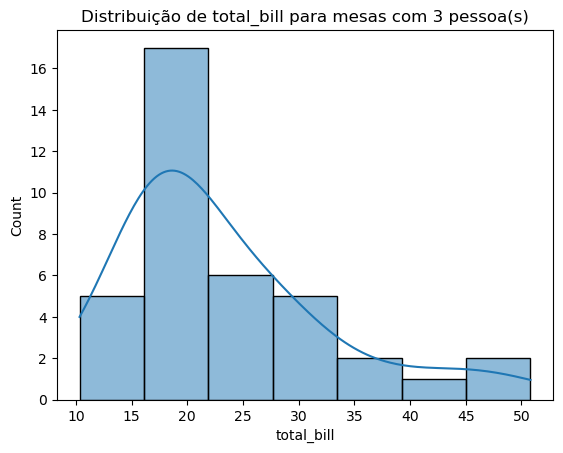

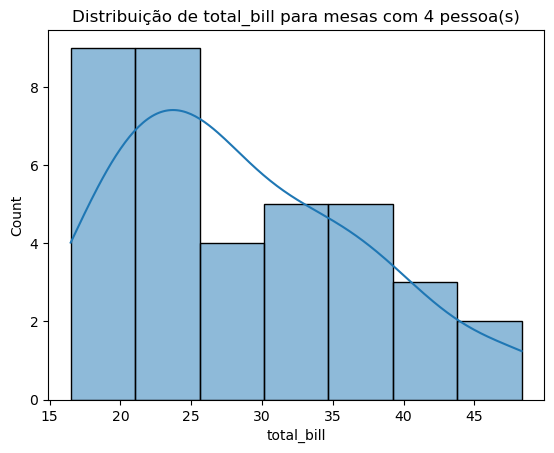

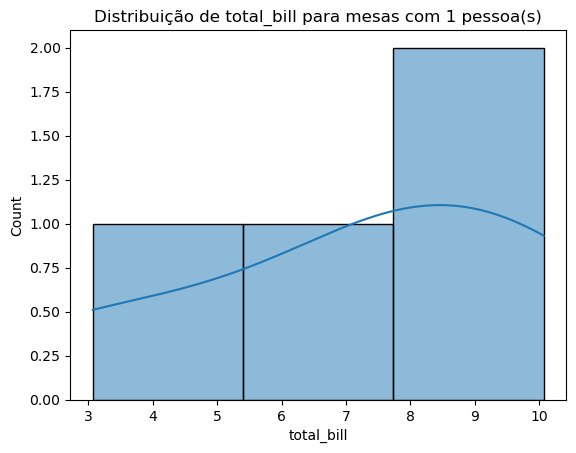

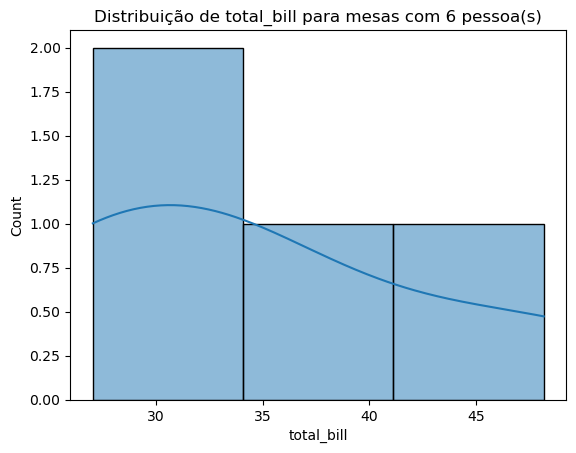

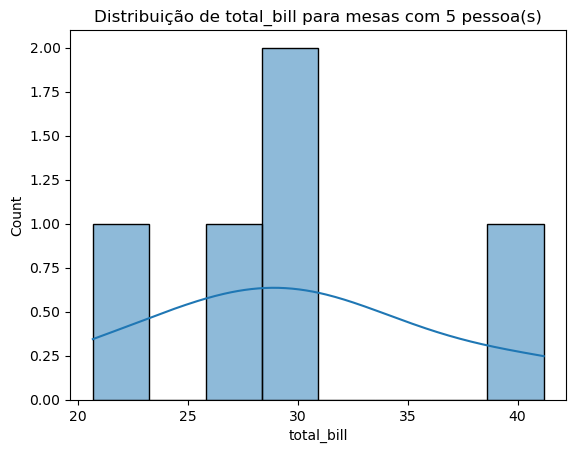

In [115]:
for tamanho in df["size"].unique():
    
    plt.title(f"Distribuição de total_bill para mesas com {tamanho} pessoa(s)")
    sns.histplot(data=df.query(f"size == {tamanho}"), x="total_bill", kde=True)
    plt.show()

Um argumento muito importante é o `hue` (matiz, tonalidade), que permite com que visualizemos **diferentes níveis categóricos** com cores diferentes:

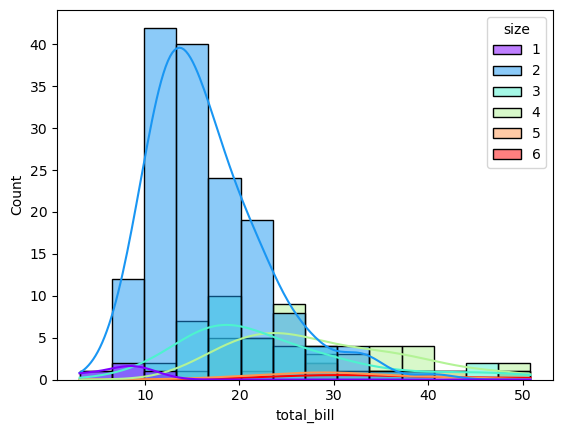

In [116]:
sns.histplot(data=df, x="total_bill", kde=True, hue="size", palette="rainbow");

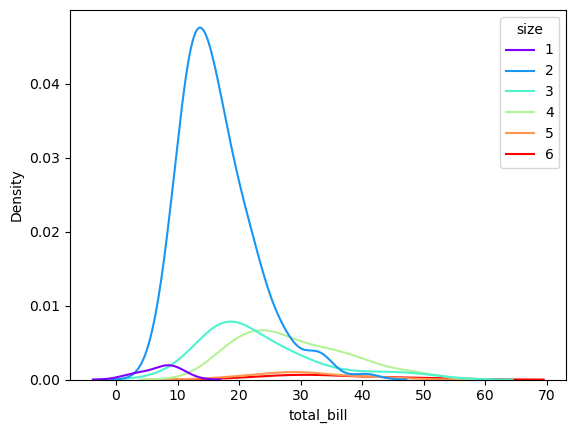

In [117]:
sns.kdeplot(data=df, x="total_bill", hue="size", palette="rainbow");

Também é possível visualizar distribuições em duas dimensões:

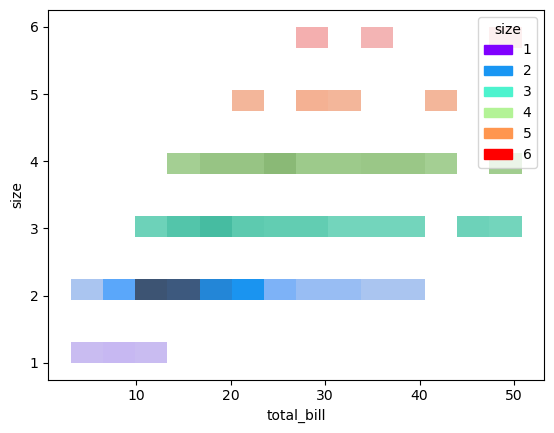

In [118]:
sns.histplot(data=df, x="total_bill", y="size", hue="size", palette="rainbow");

A legenda tá bem em cima do gráfico, Pra colocar ela pra fora, não é tão simples no seaborn, mas é possível com o seguinte código:

C:\Users\karer\AppData\Local\Temp\ipykernel_6760\2314486093.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=ax.legend_.legendHandles,


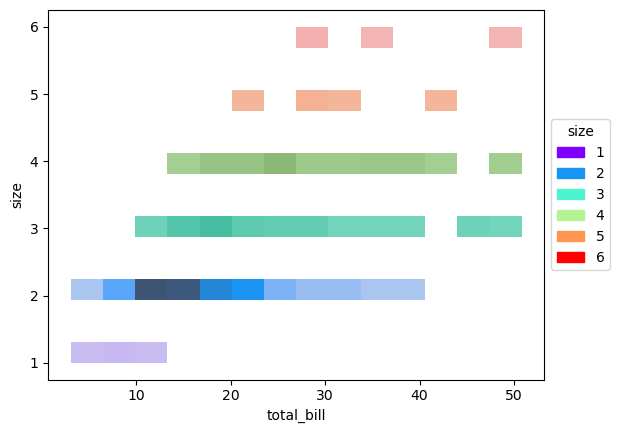

In [119]:
ax = sns.histplot(data=df, x="total_bill", y="size", hue="size", palette="rainbow");

ax.legend(handles=ax.legend_.legendHandles,
          labels=[t.get_text() for t in ax.legend_.texts],
          title=ax.legend_.get_title().get_text(),
          # argumento de posicionamento da legenda
          bbox_to_anchor=(1, 0.5), loc="center left")

plt.show()

In [120]:
# Recebendo o texto do titulo da coluna que o grafico esta plotando.
ax.legend_.get_title().get_text()

'size'

In [121]:
# Recebendo os valores categoricos existentes da coluna size.

ax.legend_.texts

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

In [122]:
[t.get_text() for t in ax.legend_.texts]

['1', '2', '3', '4', '5', '6']

In [123]:
# codigo dos objetos representativos do grafico junto com suas cores.
ax.legend_.legendHandles

C:\Users\karer\AppData\Local\Temp\ipykernel_6760\1772971882.py:2: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend_.legendHandles


Aplique essa técnica a todos os gráficos do seaborn que vc quiser posicionar a legenda fora do eixo ;)

Vamos ver a distribuição de outras colunas numéricas...

C:\Users\karer\AppData\Local\Temp\ipykernel_6760\1189196362.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=ax.legend_.legendHandles,


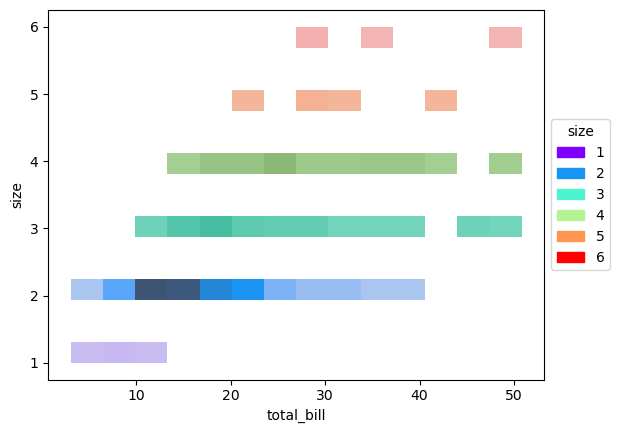

C:\Users\karer\AppData\Local\Temp\ipykernel_6760\1189196362.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=ax.legend_.legendHandles,


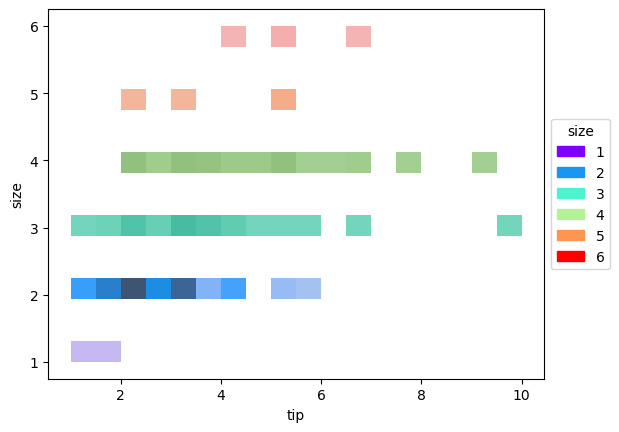

C:\Users\karer\AppData\Local\Temp\ipykernel_6760\1189196362.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=ax.legend_.legendHandles,


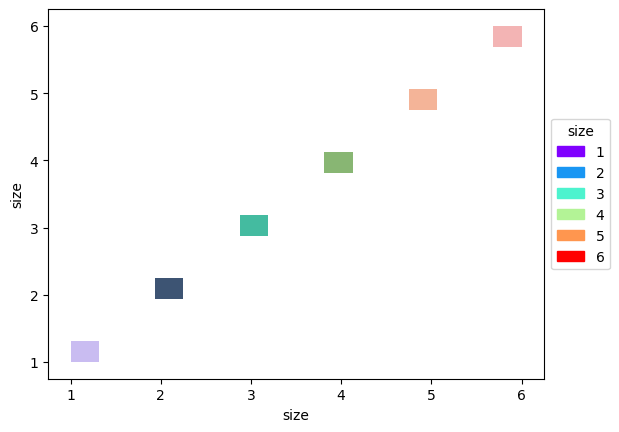

In [124]:
for col in df.select_dtypes(include=np.number):
    
    ax = sns.histplot(data=df, x=col, y="size", hue="size", palette="rainbow");

    ax.legend(handles=ax.legend_.legendHandles,
          labels=[t.get_text() for t in ax.legend_.texts],
          title=ax.legend_.get_title().get_text(),
          # argumento de posicionamento da legenda
          bbox_to_anchor=(1, 0.5), loc="center left")
    plt.show()

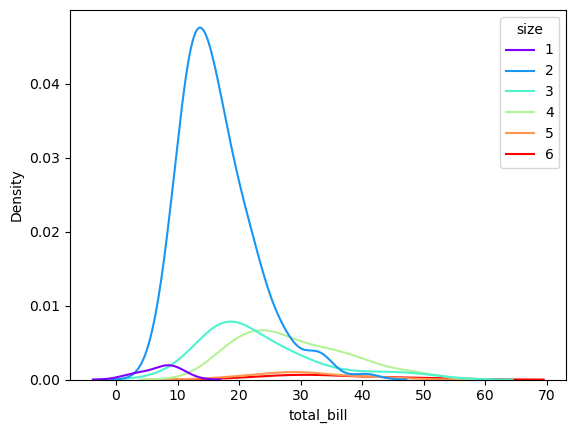

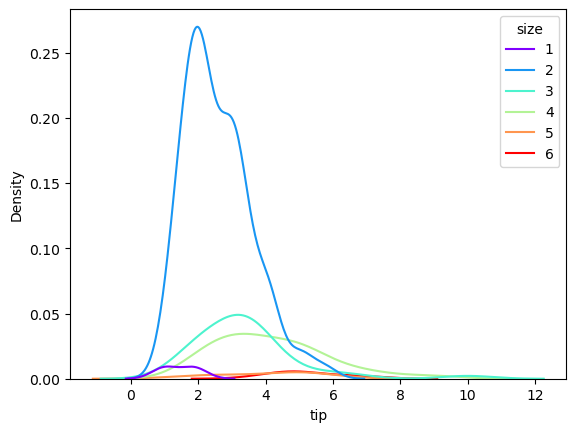

C:\Users\karer\AppData\Local\Temp\ipykernel_6760\1954542020.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df, x=col, hue="size", palette="rainbow")


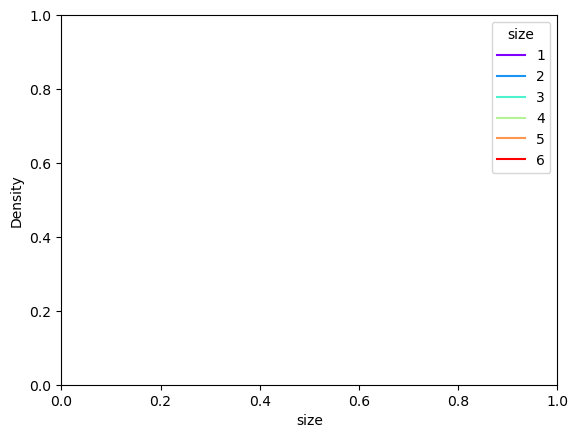

In [125]:
for col in df.select_dtypes(include=np.number):
    
    ax = sns.kdeplot(data=df, x=col, hue="size", palette="rainbow")
    plt.show()

__Jointplot__

O jointplot é um gráfico que relaciona duas colunas diferentes.

Em cada um dos eixos são exibidas as distribuições das respectivas colunas, e entre os eixos é mostrado algum tipo de gráfico para os pares de pontos das duas colunas.

Este gráfico no meio é definido pelo parâmetro "kind", que pode assumir 6 valores diferentes.

Através desse gráfico podemos rapidamente examinar a **relação entre as diferentes variáveis**! Dessa forma, podemos já saber o que esperar das análises posteriores

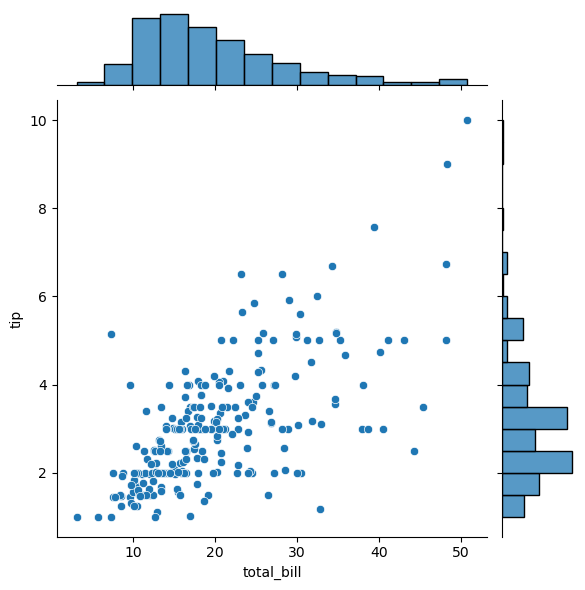

In [126]:
sns.jointplot(data=df, x="total_bill", y="tip");

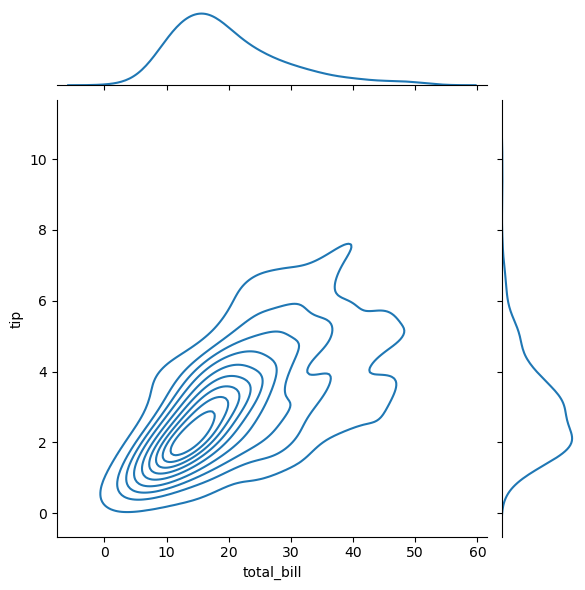

In [127]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="kde");

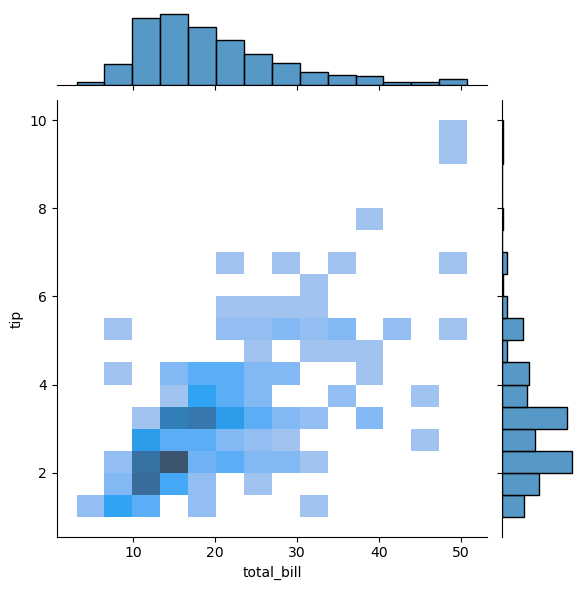

In [128]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="hist");

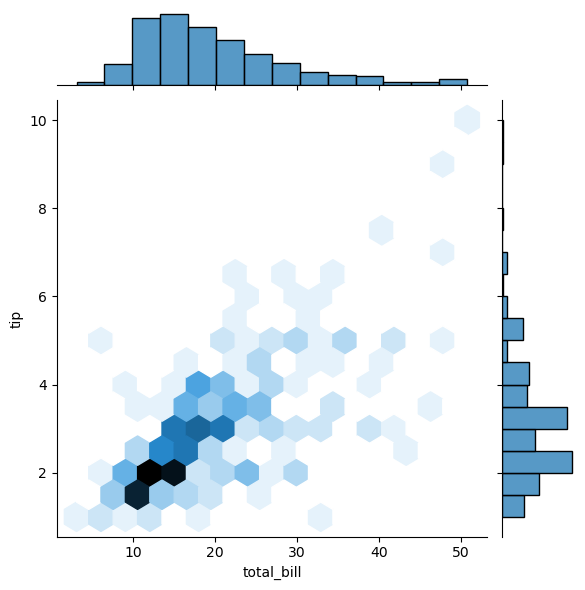

In [129]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="hex");

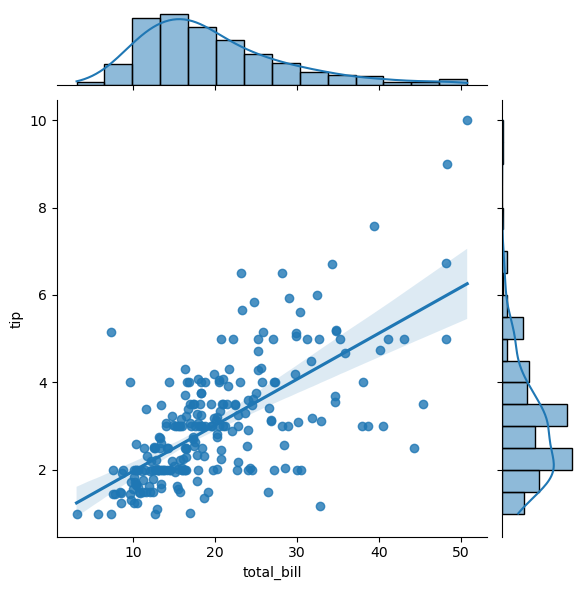

In [130]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="reg");

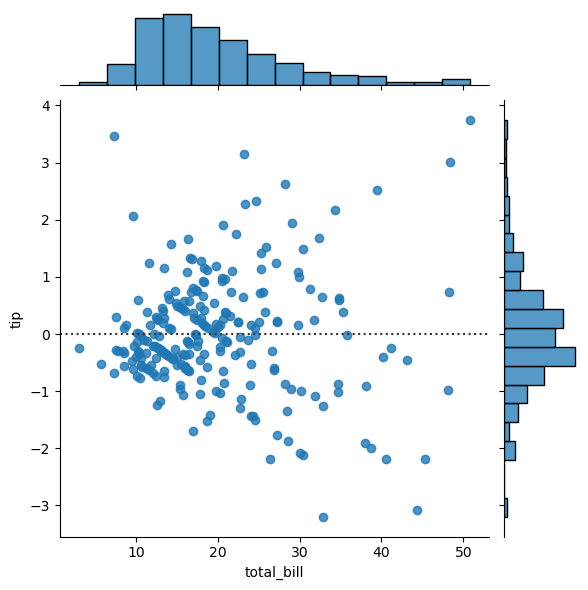

In [131]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="resid");

Aqui também é legal usar o `hue`: 

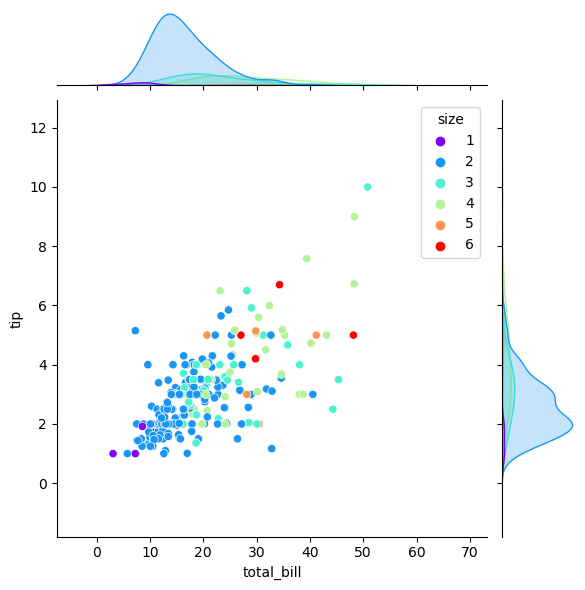

In [132]:
sns.jointplot(data=df, x="total_bill", y="tip", hue="size", palette="rainbow");

In [133]:
for col in df.select_dtypes(exclude=np.number):
    
    print(df[col].value_counts())
    print()

sex
Male      157
Female     87
Name: count, dtype: int64

smoker
No     151
Yes     93
Name: count, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time
Dinner    176
Lunch      68
Name: count, dtype: int64



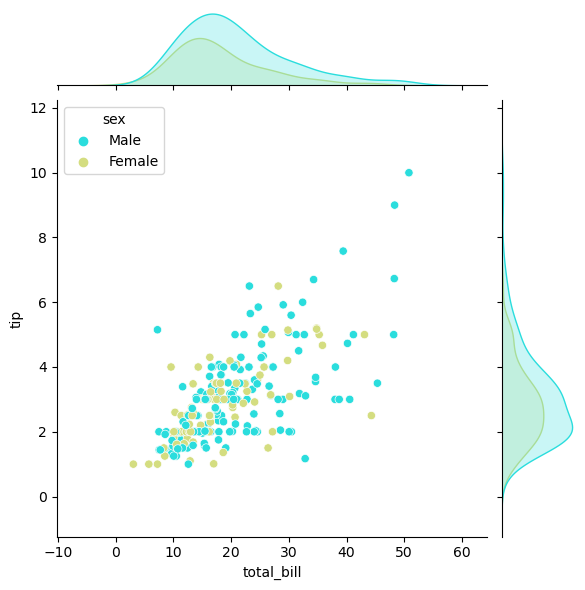

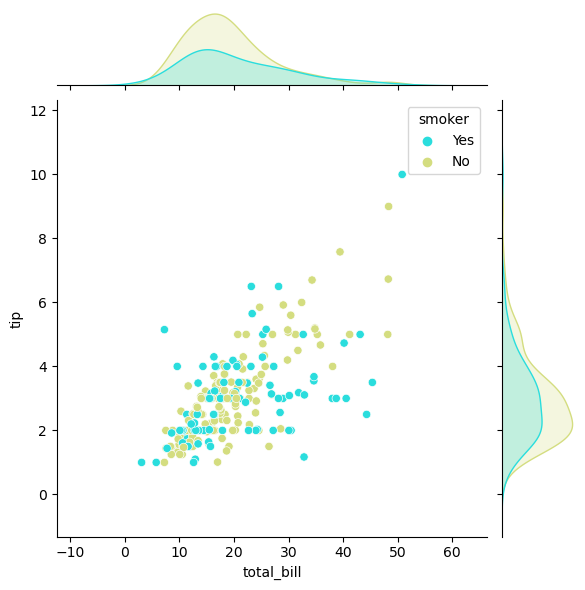

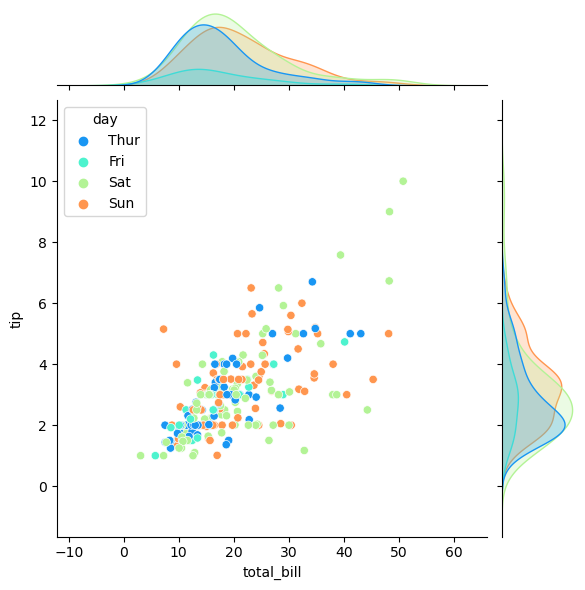

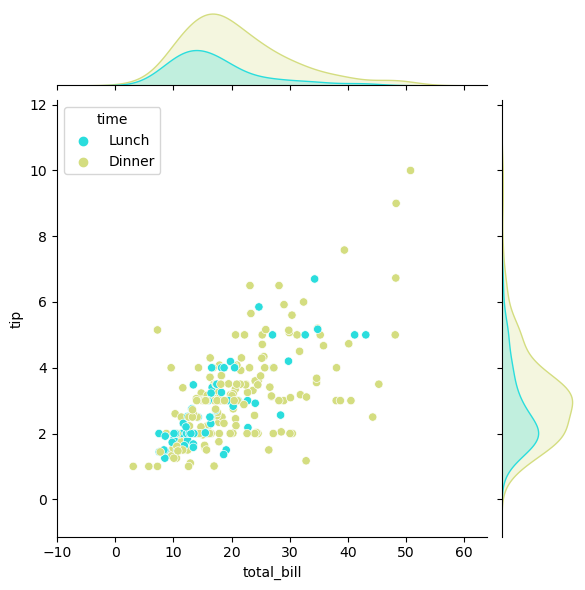

In [134]:
for col in df.select_dtypes(exclude=np.number):
    
    sns.jointplot(data=df, x="total_bill", y="tip", hue=col, palette="rainbow");

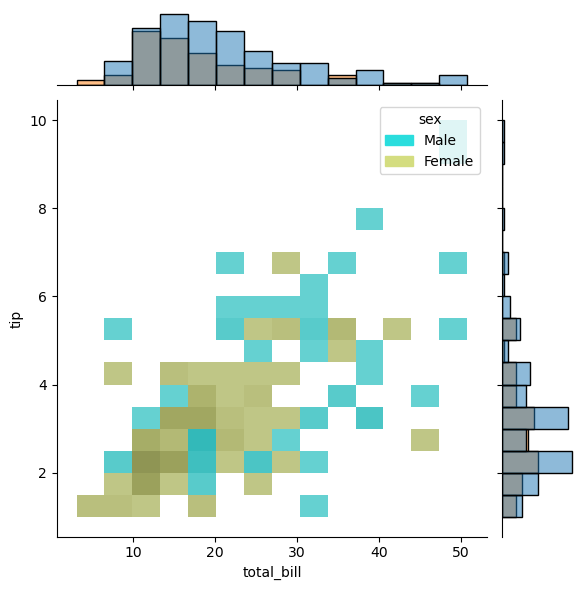

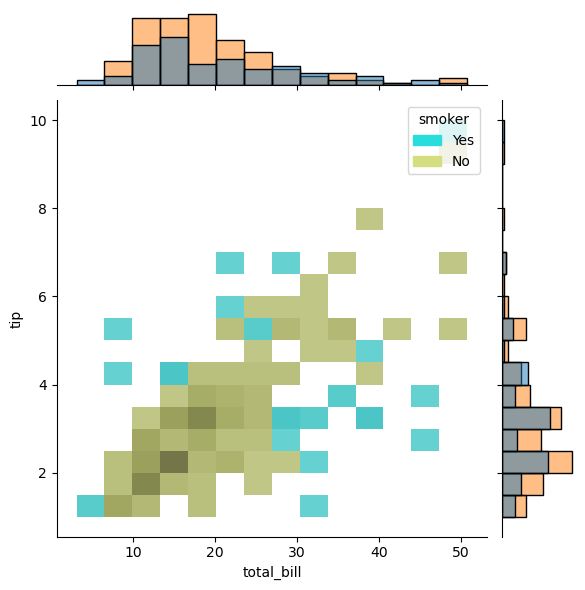

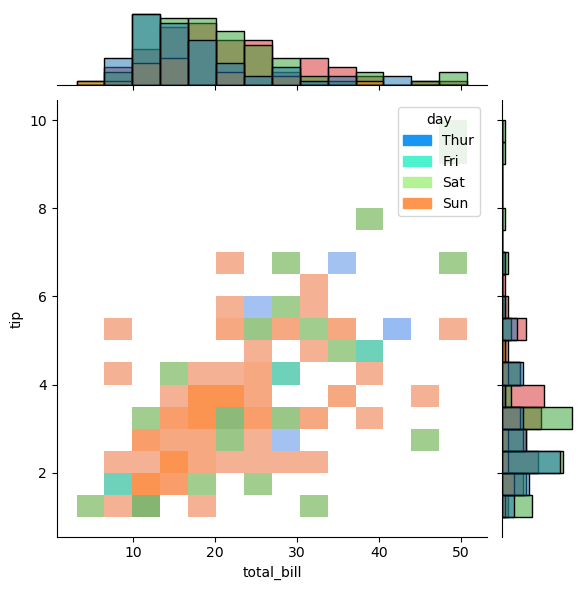

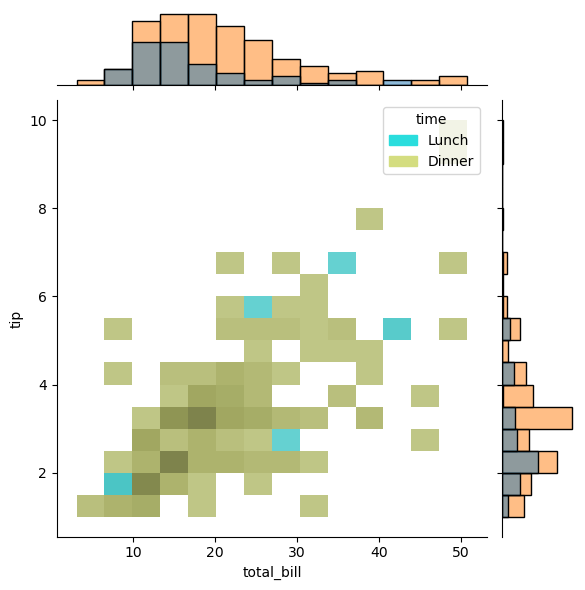

In [135]:
for col in df.select_dtypes(exclude=np.number):
    
    sns.jointplot(data=df, x="total_bill", y="tip", hue=col, palette="rainbow", kind="hist");

Podemos criar uma nova coluna "weekday", que indica se o dia é dia útil ou fim de semana:

In [136]:
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [137]:
df["type_day"] = df["day"].apply(lambda x: "weekday" if x in ['Thur', 'Fri'] else "weekend")

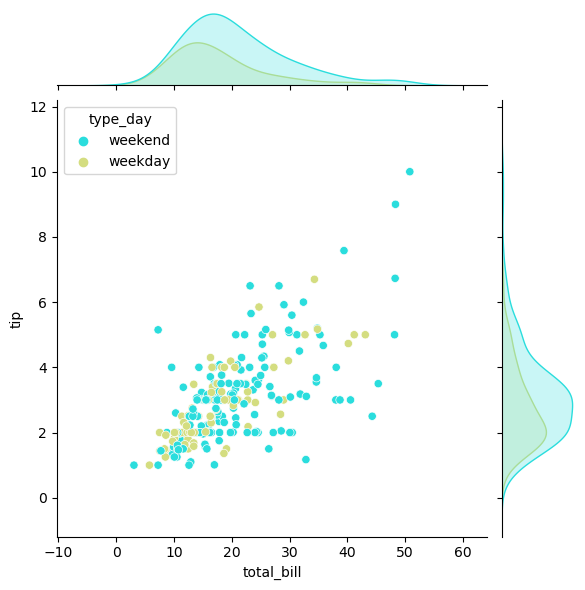

In [138]:
sns.jointplot(data=df, x="total_bill", y="tip", hue="type_day", palette="rainbow");

__Pairplot__

O pairplot produz uma matriz de gráficos, onde a diagonal principal terá a **distribuição** dos dados da respectiva coluna, e os demais elementos são **gráficos de relação** entre as diferentes colunas.

Ambos os gráficos podem ser controlados pelos argumentos "diag_kind" e "kind", respectivamente

kind : {'scatter', 'kde', 'hist', 'reg'}

diag_kind : {'auto', 'hist', 'kde', None}

E:\Arquivos de programas HD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


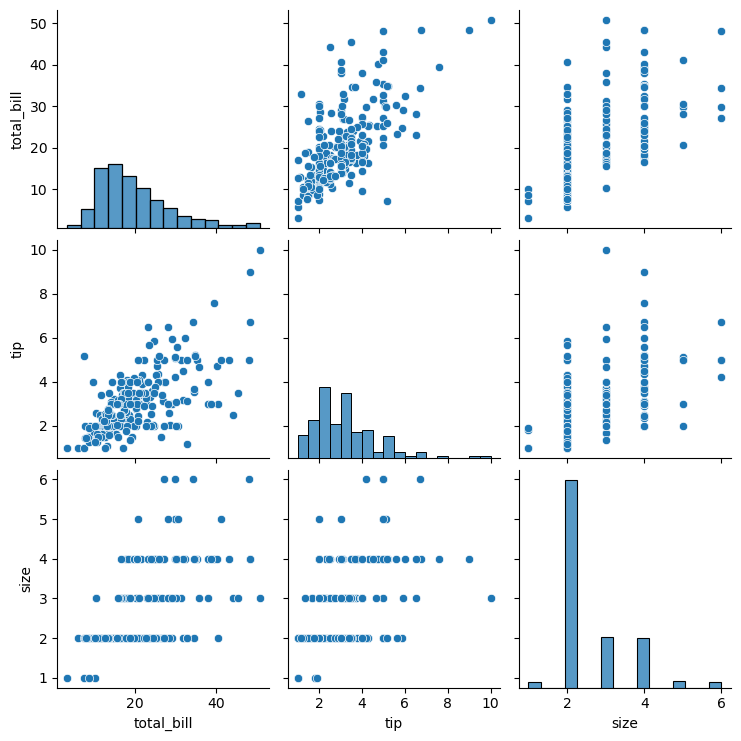

In [139]:
# essa ferramenta não é muito funcional em tabelas que contenham diversas colunas.
sns.pairplot(df);

Também é possível usar o `hue`:

E:\Arquivos de programas HD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


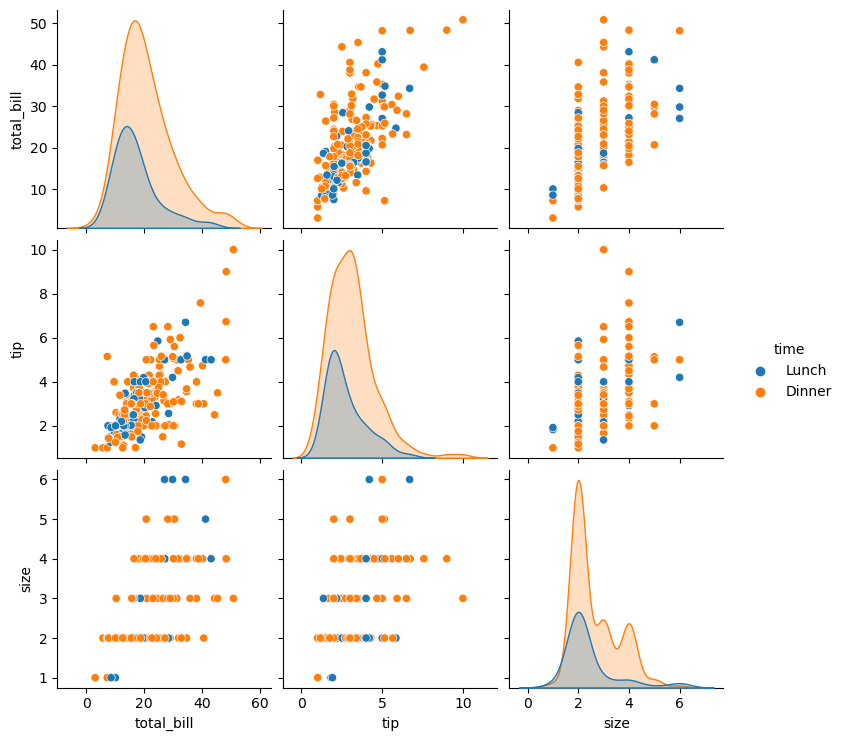

In [140]:
sns.pairplot(df, hue="time")

E:\Arquivos de programas HD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


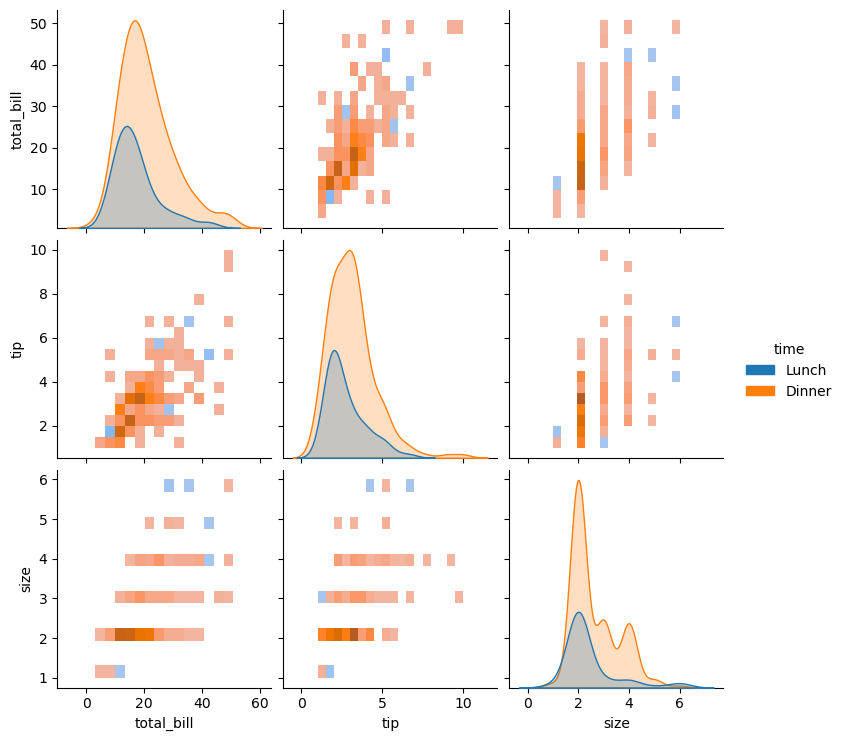

In [141]:
sns.pairplot(df, hue="time", kind="hist", diag_kind="kde")

__Boxplot__

Os gráficos "boxplots" (diagramas de caixa) ilustram a **distribuição de dados numéricos com foco em medidas de quantidade de dados**.

Nesses gráficos, é possível visualizar os **quartis**, bem como os **outliers**.

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os dados **em quatro partes iguais**:

- O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima;
- O segundo quartil, Q2 é a **mediana**, deixa 50% das observações abaixo e 50% das observações acima;
- O terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima;

O boxplot permite a visualização da construção acima:

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/3f1d2fd3-522e-4e34-a26f-04d1bcfa9f46.png" width=500>

Essas barras fora da caixa são chamadas de "whisker", que estabelecem os limites para os dados serem considerados típicos dentro da dsitrtibuição

<Axes: xlabel='total_bill', ylabel='Count'>

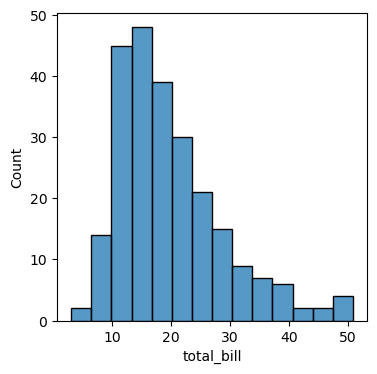

In [142]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x="total_bill")

<Axes: xlabel='total_bill'>

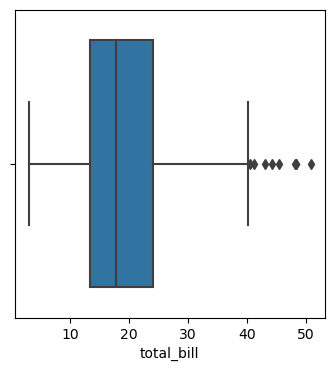

In [143]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x="total_bill")

Boxplots são bem úteis para compararmos a distribuição de uma variável numérica com relação a diferentes níveis de alguma variável categórica, de maneira similar ao que fizemos acima com o `hue`:

<Axes: xlabel='total_bill', ylabel='time'>

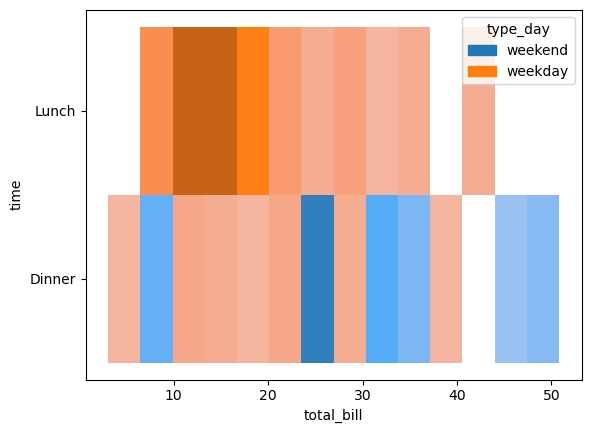

In [144]:
sns.histplot(data=df, x="total_bill", y="time", hue="type_day")

<Axes: xlabel='total_bill', ylabel='time'>

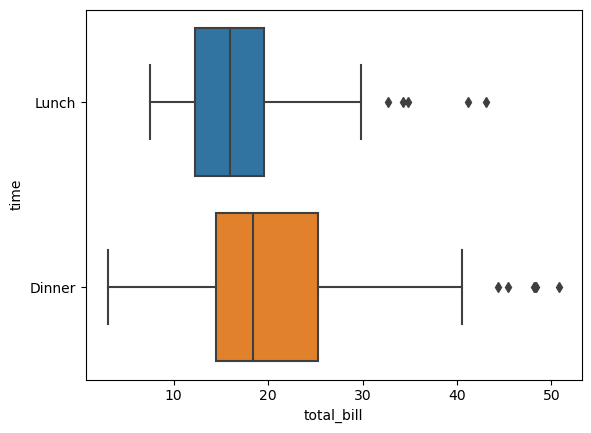

In [145]:
sns.boxplot(data=df, x="total_bill", y="time")

<Axes: xlabel='total_bill', ylabel='time'>

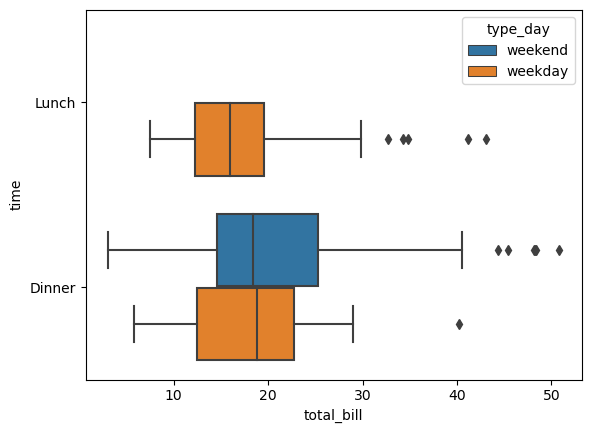

In [146]:
sns.boxplot(data=df, x="total_bill", y="time", hue="type_day")

In [147]:
df.groupby(["type_day", "time"])[["total_bill"]].median()

total_bill
type_day time              
weekday  Lunch       15.965
         Dinner      18.780
weekend  Lunch          NaN
         Dinner      18.350

Para muitos níveis categóricos, fica ainda mais simples:

<Axes: xlabel='total_bill', ylabel='time'>

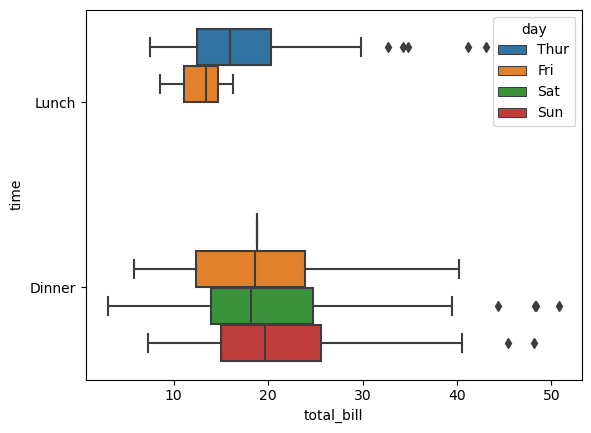

In [148]:
sns.boxplot(data=df, x="total_bill", y="time", hue="day")

In [149]:
df.groupby(["time", "day"])[["total_bill"]].agg(["count", "median"])

total_bill        
                 count  median
time   day                    
Lunch  Thur         61  16.000
       Fri           7  13.420
       Sat           0     NaN
       Sun           0     NaN
Dinner Thur          1  18.780
       Fri          12  18.665
       Sat          87  18.240
       Sun          76  19.630

Podemos, ainda, adicionar um `hue`, o que permite, na prática, comparação com duas variáveis categóricas diferentes:

__Violinplot__

Este tipo de gráfico é uma espécie de combinação entre um kdeplot e um boxplot:

<Axes: xlabel='total_bill', ylabel='time'>

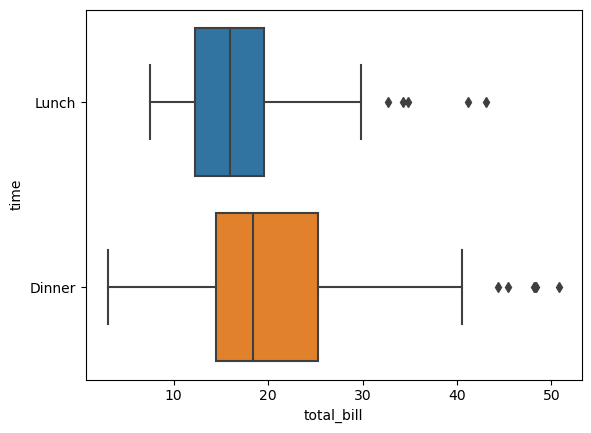

In [150]:
sns.boxplot(data=df, x="total_bill", y="time")

<Axes: xlabel='total_bill', ylabel='time'>

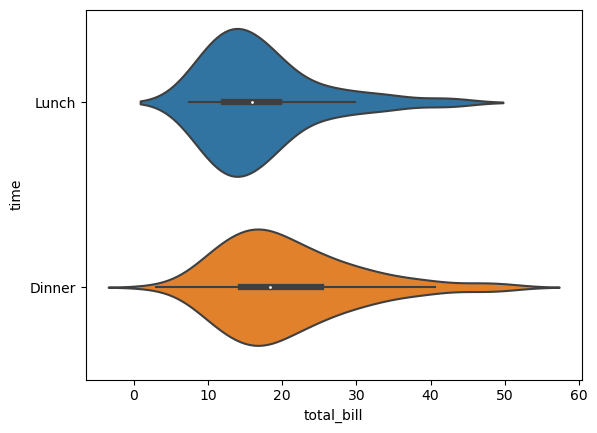

In [151]:
sns.violinplot(data=df, x="total_bill", y="time")

Esse gráfico também é muito útil para a comparação de níveis categóricos:

<Axes: xlabel='total_bill', ylabel='day'>

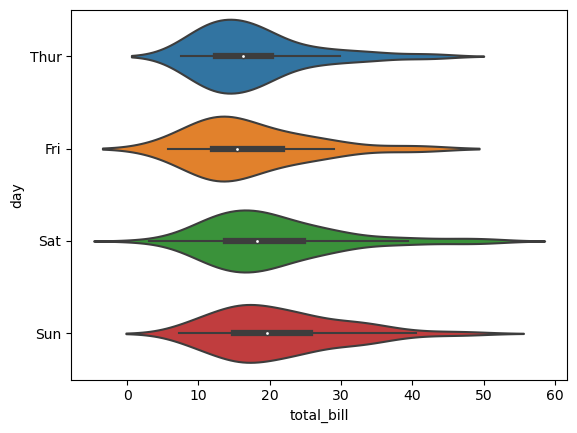

In [152]:
sns.violinplot(data=df, x="total_bill", y="day")

E também conseguimos usar o `hue`:

<Axes: xlabel='total_bill', ylabel='day'>

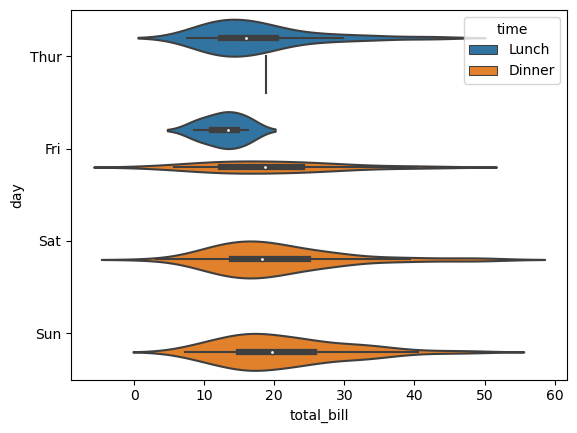

In [153]:
sns.violinplot(data=df, x="total_bill", y="day", hue="time")

O argumento "split", quando True, mostra a distribuição de cada hue no mesmo "violino":

<Axes: xlabel='total_bill', ylabel='day'>

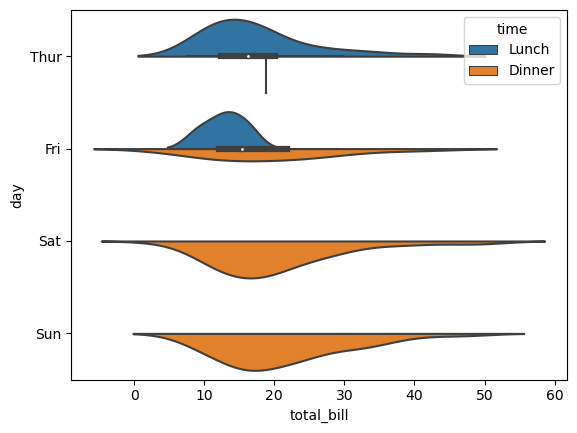

In [154]:
sns.violinplot(data=df, x="total_bill", y="day", hue="time", split=True)

 você quiser dar uma olhada em outros plots feitos usando essa mesma base, [clique aqui!](https://seaborn.pydata.org/tutorial/categorical.html)

___


### Plots categóricos

Esse tipo de gráfico é muito útil para visualizarmos os dados categóricos!

Vamos ver alguns gráficos para esse fim:

__Countplot__

Esse gráfico é a visualização do "value_counts"!

In [155]:
for col in df.select_dtypes(exclude=np.number):
    
    print(df[col].value_counts())
    print()

sex
Male      157
Female     87
Name: count, dtype: int64

smoker
No     151
Yes     93
Name: count, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time
Dinner    176
Lunch      68
Name: count, dtype: int64

type_day
weekend    163
weekday     81
Name: count, dtype: int64



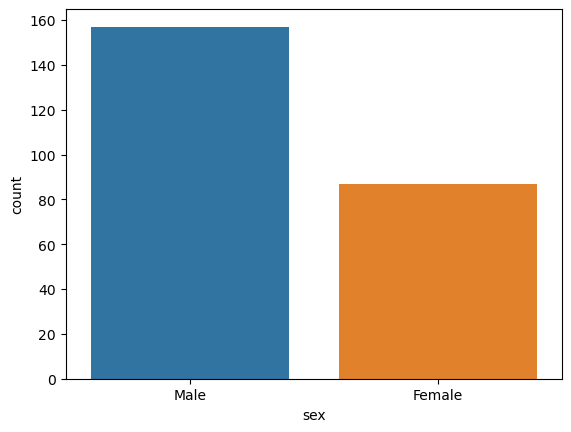

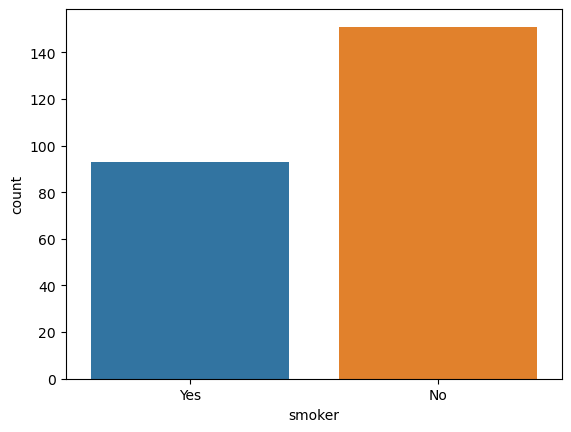

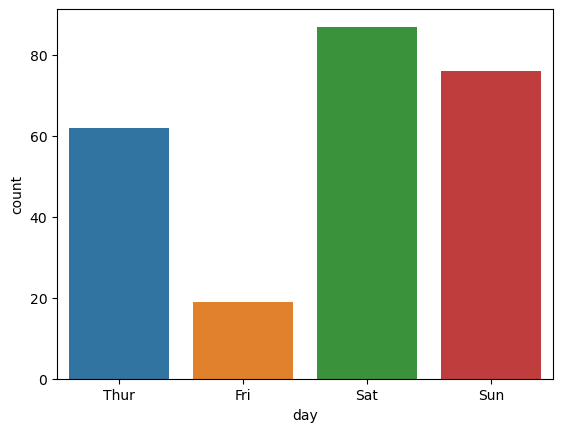

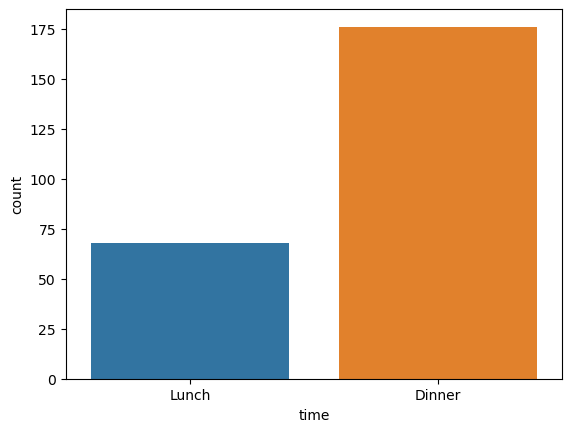

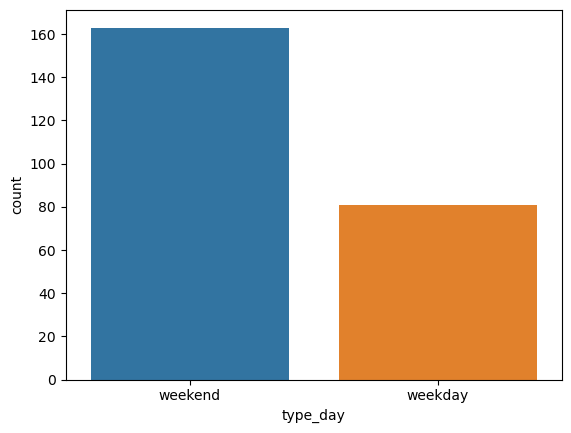

In [156]:
for col in df.select_dtypes(exclude=np.number):
    
    sns.countplot(data=df, x=col)
    plt.show()

__Barplot__

Esse é o gráfico de barras, similar ao countplot, mas com a diferença que no eixo x teremos dados categóricos, e no eixo y algum dado numérico.

O que o barplot mostra é **alguma estatística descritiva** (média, mediana, etc...) da variável numérica, separada pela variável categórica (como se fosse um "hue")

A barra no topo é a barra de erro, que por padrão é o intervalo de confiança de 95%.


In [157]:
df.groupby("type_day")[["total_bill"]].mean()

,total_bill
type_day,
weekday,17.558148
weekend,20.893006


<Axes: xlabel='type_day', ylabel='total_bill'>

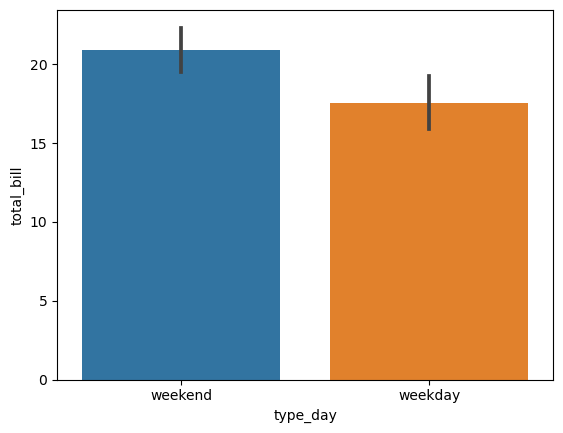

In [158]:
sns.barplot(data=df, x="type_day", y="total_bill")

É possível mudar a função descritiva:


In [159]:
df.groupby("type_day")[["total_bill"]].median()

,total_bill
type_day,
weekday,15.98
weekend,18.35


<Axes: xlabel='type_day', ylabel='total_bill'>

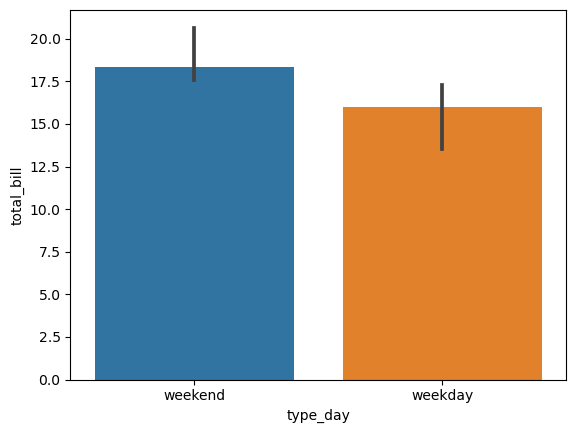

In [160]:
sns.barplot(data=df, x="type_day", y="total_bill", estimator=np.median)

___

### Plots de matriz


Usamos gráficos de matriz para visualizar pictoricameente a relação entre números em uma matriz, em uma escala de cores.

O principal tipo de gráfico para esta finalizada é o **heatmap**

__Heatmap__

Este tipo de gráfico cria uma __escala de cor__ em que o menor valor corresponderá à cor mais clara, e o maior valor, à cor mais escura, de uma matriz.

Vamos considerar, por exemplo, a **correlação entre as variáveis numéricas** da base. Veremos isso mais tarde no curso, mas a correção é um número que vai de -1 a 1, e indica o quanto as variáveis estão relacionadas, positiva ou negativamente.

Para fazer isso, basta usar o método .corr():

In [161]:
df.corr()

ValueError: could not convert string to float: 'No'

Para plotar o heatmap, basta fazer:

In [162]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'No'

É possível determinar os limites da escala de cor:

<AxesSubplot:>

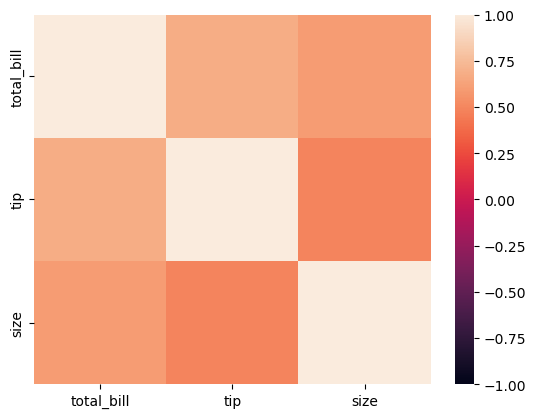

In [138]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)

Podemos também indicar os valores numéricos:

<AxesSubplot:>

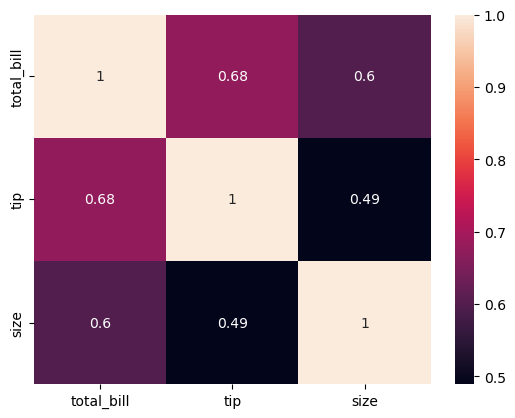

In [139]:
sns.heatmap(df.corr(), annot=True)

Podemos também mudar o visual do gráfico, com o atributo "cmap" ou "palette" (a depender do tipo de gráfico: veja com o "shift + tab")

Para um guia da paleta de cores, [clique aqui!](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html) e [aqui!](https://seaborn.pydata.org/tutorial/color_palettes.html)

<AxesSubplot:>

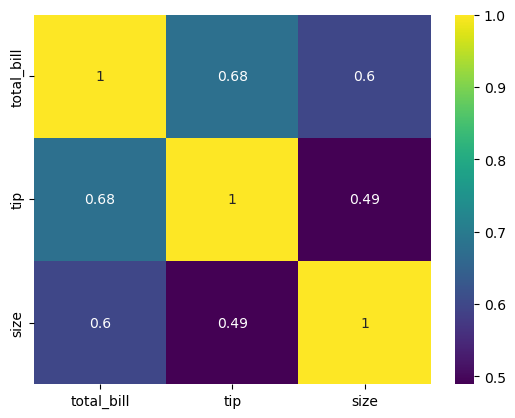

In [147]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Além da paleta de cores, também é possível alterar o visual dos gráficos feitos com o seaborn! Para um guia com algumas dicas de como fazer isso, [clique aqui!](http://seaborn.pydata.org/tutorial/aesthetics.html)

____

Esses são os principais gráficos do Seaborn, mas existem muitos outros!

Para explorar mais, veja a [documentação da biblioteca](https://seaborn.pydata.org/), e [alguns exemplos e tutoriais](https://seaborn.pydata.org/tutorial.html).

___
___
___